In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
import os

# Load the file and parse the data
matrix = []
# Directory containing the files
directory = '/home/haaaaron/suN-gauge-twist-surface/'

# Dictionary to store matrices
matrices = {}

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.startswith('volume_snapshot_'):
        # Extract the unique part of the filename
        key = filename.split('_')[-2] + "_" + filename.split('_')[-1].split('.')[0]
        
        # Load the file and parse the data
        matrix = []
        with open(os.path.join(directory, filename), 'r') as file:
            for line in file:
                # Split the line at the colon and take the part after it
                _, complex_numbers = line.split(':')
                # Convert the complex numbers into a list of Python complex numbers
                row = [complex(num) for num in complex_numbers.split(",")]
                row = row[1:] + [row[0]]
                matrix.append(row)
        
        # Convert the list of lists into a 2D numpy array and store it in the dictionary
        matrices[key] = np.array(matrix)
        # Sort the matrices dictionary based on the keys
matrices = dict(sorted(matrices.items(), key=lambda item: int(item[0].split('_')[0])))

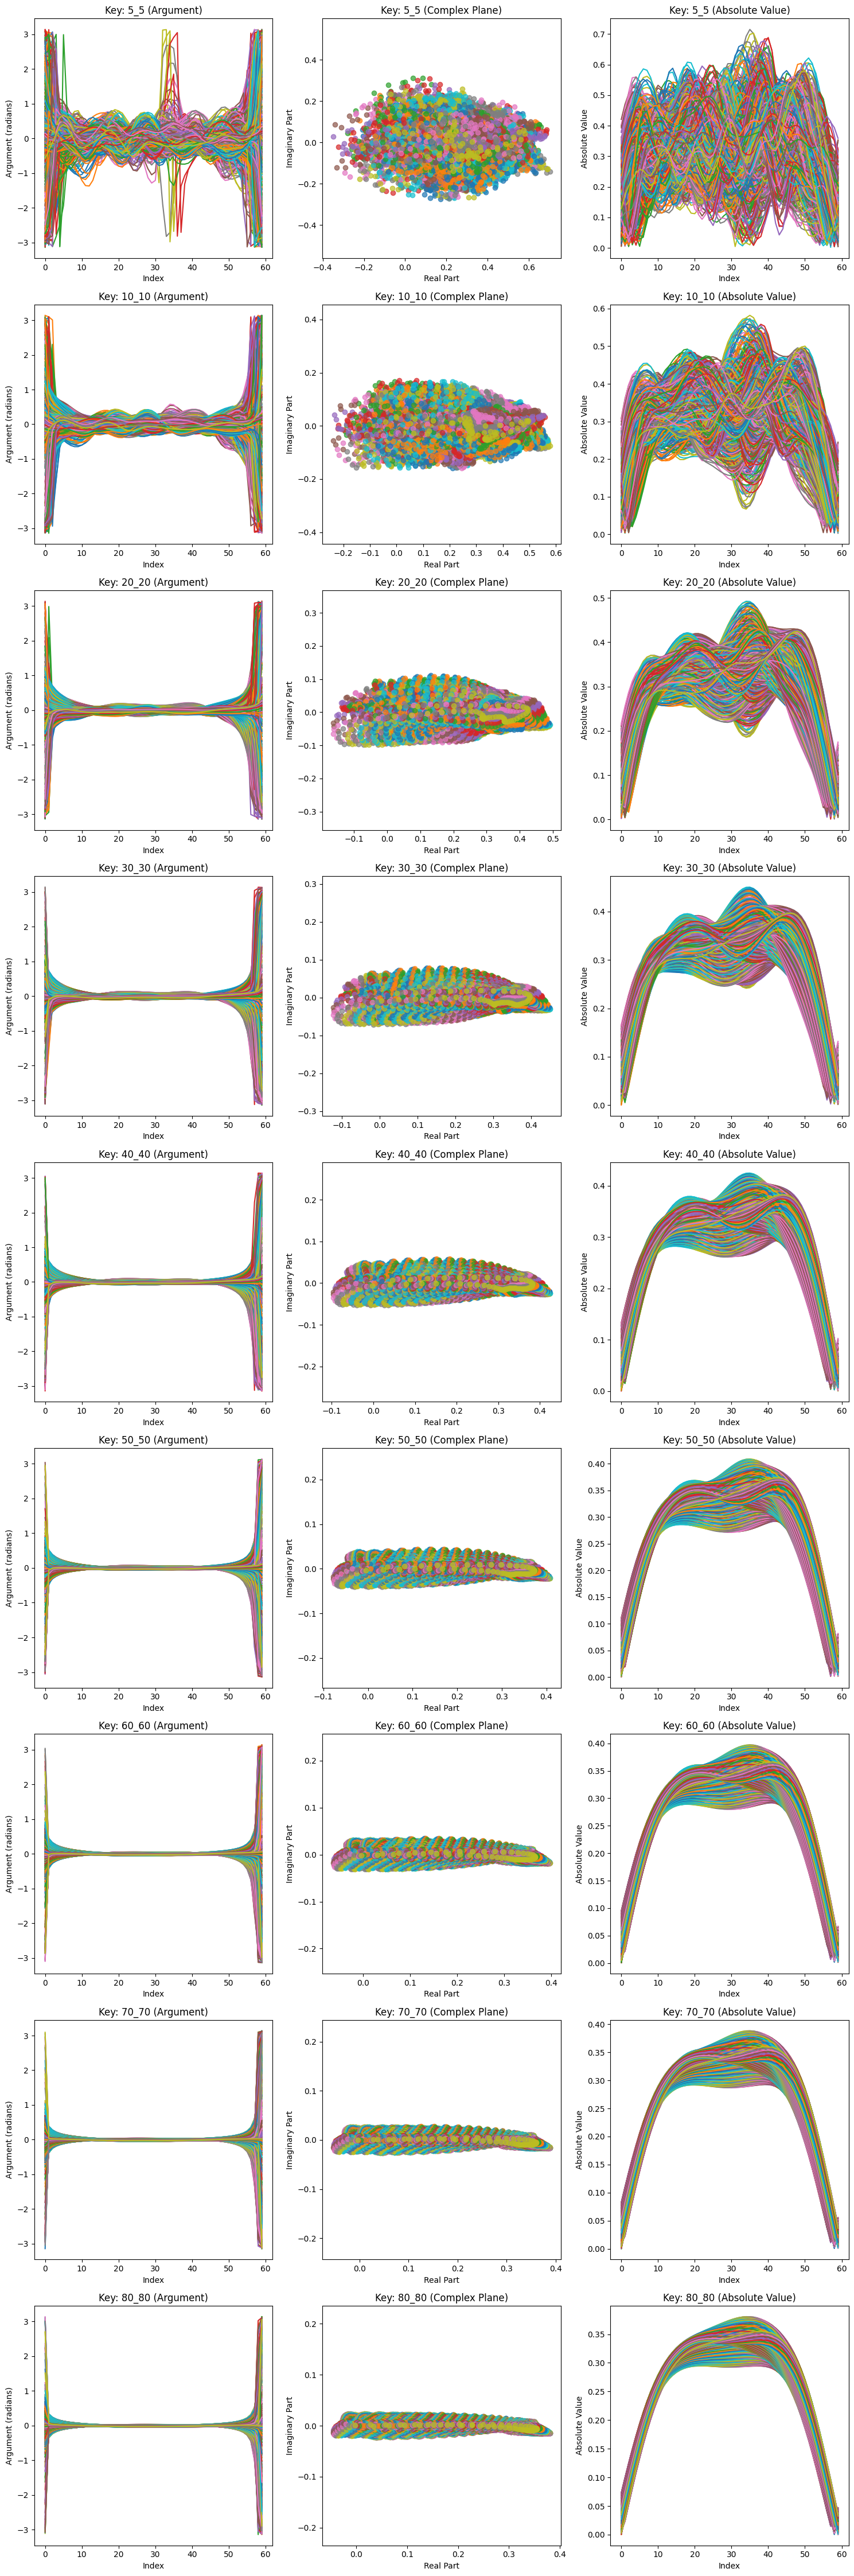

In [52]:
# Create a figure with subplots for each key, two columns: left for argument, right for complex plane
fig, axes = plt.subplots(len(matrices), 3, figsize=(15, 5 * len(matrices)))
range_0 = 0
range_1 = -1
# If there's only one key, axes won't be a 2D array, so we ensure it's iterable
if len(matrices) == 1:
    axes = [axes]

# Iterate over the dictionary and plot each row of the matrix
for (key, matrix), ax_row in zip(matrices.items(), axes):
    # Left column: plot the argument of the complex numbers
    for row in matrix[range_0:range_1]:
        row = np.angle(row)
        ax_row[0].plot(list(range(len(row))), row)
    ax_row[0].set_title(f'Key: {key} (Argument)')
    ax_row[0].set_xlabel('Index')
    ax_row[0].set_ylabel('Argument (radians)')

    # Right column: plot the complex numbers in the complex plane
    for row in matrix[range_0:range_1]:
        ax_row[1].scatter(np.real(row), np.imag(row), alpha=0.7)
    ax_row[1].set_title(f'Key: {key} (Complex Plane)')
    ax_row[1].set_xlabel('Real Part')
    ax_row[1].set_ylabel('Imaginary Part')
    ax_row[1].axis('equal')


    # Third column: plot the absolute value of the complex numbers
    for row in matrix[range_0:range_1]:
        row = np.abs(row)
        ax_row[2].plot(list(range(len(row))), row)
    ax_row[2].set_title(f'Key: {key} (Absolute Value)')
    ax_row[2].set_xlabel('Index')
    ax_row[2].set_ylabel('Absolute Value')
plt.tight_layout()
plt.show()